In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("savedData/covid19data.csv")
df

/home/nikhere/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Day,Month,Year
0,0,1.0,30/01/2020,20,F,Thrissur,Thrissur,Kerala,Recovered,30,1,2020
1,1,1.0,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered,2,2,2020
2,2,1.0,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,Recovered,3,2,2020
3,3,1.0,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,2,3,2020
4,4,1.0,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,Recovered,2,3,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
145854,22800,2.0,07/07/2020,NaN,NaN,NaN,Dadra and Nagar Haveli,Dadra and Nagar Haveli and Daman and Diu,Hospitalized,7,7,2020
145855,22801,-9.0,07/07/2020,NaN,NaN,NaN,NaN,Sikkim,Recovered,7,7,2020
145856,22802,-6.0,07/07/2020,NaN,NaN,NaN,NaN,Sikkim,Recovered,7,7,2020
145857,22803,-1.0,07/07/2020,NaN,NaN,NaN,Kozhikode,Kerala,Recovered,7,7,2020


In [3]:
data = df.iloc[:, 1:]
data

,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Day,Month,Year
0,1.0,30/01/2020,20,F,Thrissur,Thrissur,Kerala,Recovered,30,1,2020
1,1.0,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered,2,2,2020
2,1.0,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,Recovered,3,2,2020
3,1.0,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,2,3,2020
4,1.0,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,Recovered,2,3,2020
...,...,...,...,...,...,...,...,...,...,...,...
145854,2.0,07/07/2020,NaN,NaN,NaN,Dadra and Nagar Haveli,Dadra and Nagar Haveli and Daman and Diu,Hospitalized,7,7,2020
145855,-9.0,07/07/2020,NaN,NaN,NaN,NaN,Sikkim,Recovered,7,7,2020
145856,-6.0,07/07/2020,NaN,NaN,NaN,NaN,Sikkim,Recovered,7,7,2020
145857,-1.0,07/07/2020,NaN,NaN,NaN,Kozhikode,Kerala,Recovered,7,7,2020


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145859 entries, 0 to 145858
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Num Cases          145856 non-null  float64
 1   Date Announced     145859 non-null  object 
 2   Age Bracket        60013 non-null   object 
 3   Gender             62808 non-null   object 
 4   Detected City      10949 non-null   object 
 5   Detected District  137460 non-null  object 
 6   Detected State     145850 non-null  object 
 7   Current Status     145857 non-null  object 
 8   Day                145859 non-null  int64  
 9   Month              145859 non-null  int64  
 10  Year               145859 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 12.2+ MB


In [11]:
val = data.isnull().sum(axis=0).sort_values()/len(data)*100 #missing values as per column
round(val, 2)

Date Announced        0.00
Day                   0.00
Month                 0.00
Year                  0.00
Current Status        0.00
Num Cases             0.00
Detected State        0.01
Detected District     5.76
Gender               56.94
Age Bracket          58.86
Detected City        92.49
dtype: float64

In [14]:
val = data.isnull().sum(axis=1).sort_values(ascending=False) #missing values as per rows
round(val, 2)

28451     6
69008     6
69009     6
28834     5
4375      5
         ..
108695    0
108694    0
108693    0
108692    0
0         0
Length: 145859, dtype: int64

In [17]:
data.groupby('Month')['Num Cases'].sum()

Month
1         1.0
2         2.0
3      1635.0
4     36078.0
5    242853.0
6    663178.0
7    270185.0
Name: Num Cases, dtype: float64

In [24]:
M = data[data['Current Status']=='Hospitalized'].groupby('Month')['Num Cases'].sum()
M

Month
3      1431.0
4     33208.0
5    155781.0
6    395144.0
7    157701.0
Name: Num Cases, dtype: float64

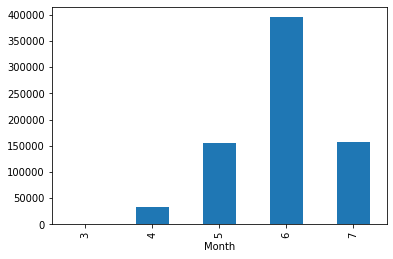

In [25]:
M.plot.bar()
plt.show()

In [26]:
data.groupby('Gender')['Num Cases'].sum()

Gender
F             21294.0
M             42795.0
M                 1.0
Non-Binary       12.0
Name: Num Cases, dtype: float64

In [32]:
A = data.groupby('Age Bracket')['Num Cases'].sum().sort_values(ascending=False).head(10)
A

Age Bracket
30.0    1209.0
40.0    1027.0
25.0    1015.0
35.0     992.0
32.0     936.0
45.0     893.0
24.0     880.0
28.0     858.0
27.0     818.0
26.0     810.0
Name: Num Cases, dtype: float64

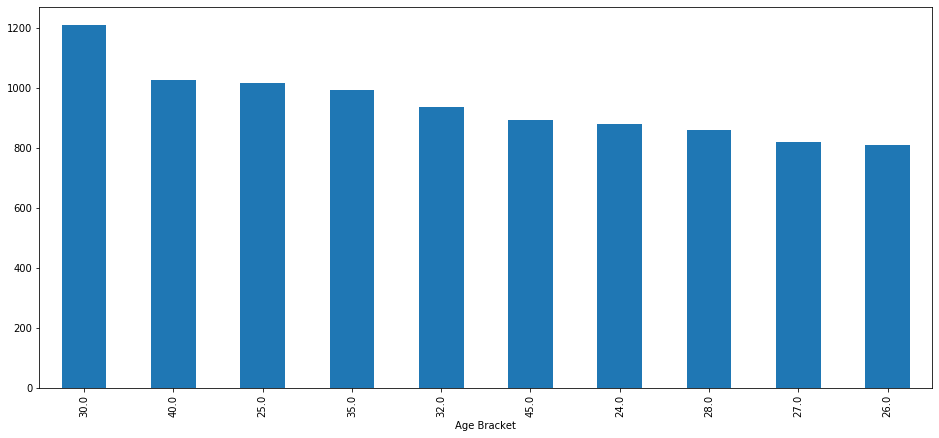

In [35]:
A.plot.bar(figsize=(16, 7))
plt.show()

In [43]:
S = data[data['Current Status']=='Hospitalized'].groupby('Detected State')['Num Cases'].sum().sort_values(ascending=False)
S

Detected State
Maharashtra                                 217107.0
Tamil Nadu                                  118587.0
Delhi                                       102827.0
Gujarat                                      37631.0
Uttar Pradesh                                29959.0
Telangana                                    27610.0
Karnataka                                    26742.0
West Bengal                                  23831.0
Rajasthan                                    21400.0
Andhra Pradesh                               21195.0
Haryana                                      17987.0
Madhya Pradesh                               15625.0
Assam                                        13337.0
Bihar                                        12524.0
Odisha                                       10096.0
Jammu and Kashmir                             8930.0
Punjab                                        6747.0
Kerala                                        5834.0
State Unassigned               

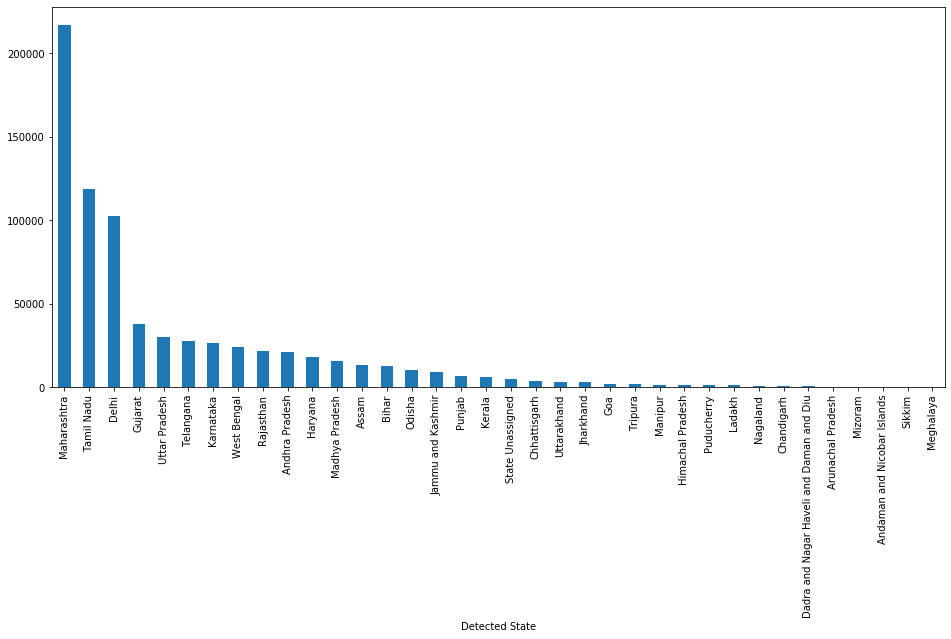

In [44]:
S.plot.bar(figsize=(16, 7))
plt.show()

In [48]:
Day = data[data['Current Status']=='Hospitalized'].groupby(['Month', 'Day'])[['Num Cases']].sum()
Day

Num Cases
Month Day           
3     4          5.0
      5          1.0
      7          2.0
      9          4.0
      10         4.0
...              ...
7     3      22718.0
      4      24018.0
      5      23942.0
      6      22500.0
      7      23147.0

[124 rows x 1 columns]

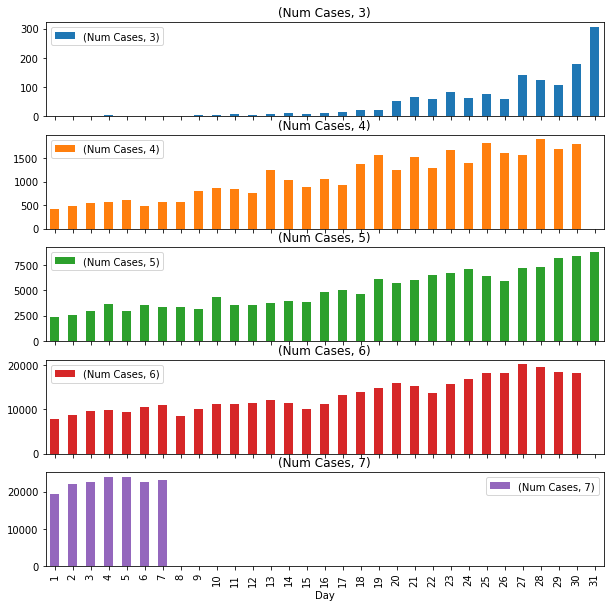

In [51]:
Day.unstack(level=0).plot(kind="bar", subplots=True, figsize=(10, 10))
plt.show()

In [53]:
data['Current Status'].unique()

array(['Recovered', 'Hospitalized', 'Deceased', 'Migrated',
       'Migrated_Other', nan, 'Migrated_other'], dtype=object)

In [55]:
data[data['Current Status']=='Deceased']['Num Cases'].sum()

19818.0

In [60]:
#data[data['Current Status']=='Deceased']['Num Cases'].groupby('Detected State')['Num Cases'].sum().sort_values(ascending=False)
D = data[data['Current Status']=='Deceased'].groupby('Detected State')['Num Cases'].sum().sort_values(ascending=False)
D

Detected State
Maharashtra                                 8919.0
Delhi                                       3112.0
Gujarat                                     1831.0
Tamil Nadu                                  1613.0
Uttar Pradesh                                798.0
West Bengal                                  787.0
Madhya Pradesh                               521.0
Rajasthan                                    432.0
Karnataka                                    410.0
Telangana                                    289.0
Haryana                                      276.0
Andhra Pradesh                               221.0
Punjab                                       159.0
Jammu and Kashmir                            138.0
Bihar                                         97.0
Odisha                                        54.0
Uttarakhand                                   43.0
Kerala                                        27.0
Jharkhand                                     19.0
Assam           